# Multiple linear regression
# SPOILER: There is no prediction model using Multiple Linear Regression.

In [1]:
# installing libs

# !pip install pandas
# !pip install numpy
# !pip install statsmodels
# !pip install matplotlib
# !pip install -U seaborn
# !pip install pingouin
# !pip install statstests
# !pip install scipy

In [2]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from statstests.process import stepwise
from statstests.tests import shapiro_francia
from scipy.stats import boxcox
from scipy.stats import norm
from scipy import stats

In [3]:
def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

In [4]:
# reading database
# source: https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets/data
df_database = pd.read_csv('train.csv')

In [5]:
df_database

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
df_database.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_database.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df_database.dropna(inplace=True)
df_database.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df_database.duplicated().sum()

0

In [11]:
df_database['Item_Identifier'].duplicated().sum()

3115

In [12]:
print(df_database['Item_Identifier'].value_counts().sort_index())
print('-=' * 20)
print(df_database['Item_Fat_Content'].value_counts().sort_index())
print('-=' * 20)
print(df_database['Item_Type'].value_counts().sort_index())
print('-=' * 20)
print(df_database['Outlet_Identifier'].value_counts().sort_index())
print('-=' * 20)
print(df_database['Outlet_Size'].value_counts().sort_index())
print('-=' * 20)
print(df_database['Outlet_Location_Type'].value_counts().sort_index())
print('-=' * 20)
print(df_database['Outlet_Type'].value_counts().sort_index())

Item_Identifier
DRA12    3
DRA24    3
DRA59    4
DRB01    2
DRB13    3
        ..
NCZ30    3
NCZ41    3
NCZ42    3
NCZ53    3
NCZ54    3
Name: count, Length: 1535, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Item_Fat_Content
LF          177
Low Fat    2774
Regular    1575
low fat      53
reg          71
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Item_Type
Baking Goods             351
Breads                   132
Breakfast                 58
Canned                   361
Dairy                    380
Frozen Foods             477
Fruits and Vegetables    670
Hard Drinks              117
Health and Hygiene       277
Household                498
Meat                     221
Others                    91
Seafood                   33
Snack Foods              656
Soft Drinks              241
Starchy Foods             87
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Outlet_Identifier
OUT013    932
OUT018    928
OUT035    930
OUT046    930
OUT

In [13]:
# getting dummies of categorical variables
df_dummies = pd.get_dummies(df_database,
                            columns=['Item_Fat_Content',
                                     'Item_Type',
                                     'Outlet_Identifier',
                                     'Outlet_Size',
                                     'Outlet_Location_Type',
                                     'Outlet_Type'],
                            dtype=int,
                            drop_first=True)
df_dummies

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Item_Type_Starchy Foods,Outlet_Identifier_OUT018,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,FDP36,10.395,0.000000,51.4008,2009,556.6088,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,0.083607,178.8318,1997,3608.6360,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1


In [14]:
# removing white space from column names to generate the model
df_dummies.columns = df_dummies.columns.str.replace(' ', '_')
df_dummies.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low_fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen_Foods', 'Item_Type_Fruits_and_Vegetables',
       'Item_Type_Hard_Drinks', 'Item_Type_Health_and_Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack_Foods', 'Item_Type_Soft_Drinks',
       'Item_Type_Starchy_Foods', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier_2', 'Outlet_Location_Type_Tier_3',
       'Outlet_Type_Supermarket_Type2'],
      dtype='object')

In [15]:
# defining formula
columns_list = list(df_dummies.drop(columns=['Item_Identifier',
                                             'Item_Outlet_Sales']).columns)
model_formula = ' + '.join(columns_list)
model_formula = 'Item_Outlet_Sales ~ ' + model_formula

# linear regression model
reg = sm.OLS.from_formula(model_formula, df_dummies).fit()

In [16]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     159.7
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:19:14   Log-Likelihood:                -39108.
No. Observations:                4650   AIC:                         7.827e+04
Df Residuals:                    4623   BIC:                         7.844e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.9268      0.263      3.524      0.000       0.411       1.442
Item_Weight                        -3.4750      3.457     -1.005      0.315     -10.252       3.302
Item_Visibility                  -180.8401    360.581     -0.502      0.616    -887.751     526.071
Item_MRP                           16.3319      0.258     63.259      0.000      15.826      16.838
Outlet_Establishment_Year           0.0491      0.059      0.837      0.403      -0.066       0.164
Item_Fat_Content_Low_Fat           21.8084     84.762      0.257      0.797    -144.366     187.983
Item_Fat_Content_Regular           38.4442     87.672      0.438      0.661    -133.436     210.324
Item_Fat_Content_low_fat          248.0325    171.324      1.448      0.148     -87.844     583.909
Item_Fat_Content_reg              -60.0733    154.045     -0.390      0.697    -362.075     241.928
Item_Type_Breads                   83.9886    111.541      0.753      0.451    -134.684     302.661
Item_Type_Breakfast                26.5590    154.763      0.172      0.864    -276.851     329.969
Item_Type_Canned                  -45.0246     81.847     -0.550      0.582    -205.485     115.436
Item_Type_Dairy                   -92.5361     81.241     -1.139      0.255    -251.807      66.735
Item_Type_Frozen_Foods            -55.6650     76.796     -0.725      0.469    -206.221      94.891
Item_Type_Fruits_and_Vegetables   -49.2016     72.104     -0.682      0.495    -190.561      92.157
Item_Type_Hard_Drinks             -57.1382    118.171     -0.484      0.629    -288.810     174.534
Item_Type_Health_and_Hygiene       11.2897     89.773      0.126      0.900    -164.707     187.287
Item_Type_Household               -48.4732     78.684     -0.616      0.538    -202.731     105.785
Item_Type_Meat                    -29.6328     93.783     -0.316      0.752    -213.493     154.227
Item_Type_Others                  -22.8622    129.839     -0.176      0.860    -277.408     231.684
Item_Type_Seafood                 402.3797    198.838      2.024      0.043      12.562     792.197
Item_Type_Snack_Foods             -10.2667     72.487     -0.142      0.887    -152.377     131.843
Item_Type_Soft_Drinks             -81.8576     92.211     -0.888      0.375    -262.635      98.920
Item_Type_Starchy_Foods            25.9066    130.964      0.198      0.843    -230.845     282.658
Outlet_Identifier_OUT018         -126.6105     18.108     -6.992      0.000    -162.110     -91.111
Outlet_Identifier_OUT035           40.1958     16.668      2.412      0.016       7.519      72.872
Outlet_Identifier_OUT046          -60.4358     22.474     -2.689      0.007    -104.496     -16.375
Outlet_Identifier_OUT049           72.0762     17.630      4.088      0.000      37

In [17]:
# stepwise procedure
stepwise_model = stepwise(reg, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 Item_Outlet_Sales ~ Q('Item_Weight') + Q('Item_Visibility') + Q('Item_MRP') + Q('Outlet_Establishment_Year') + Q('Item_Fat_Content_Low_Fat') + Q('Item_Fat_Content_Regular') + Q('Item_Fat_Content_low_fat') + Q('Item_Fat_Content_reg') + Q('Item_Type_Breads') + Q('Item_Type_Breakfast') + Q('Item_Type_Canned') + Q('Item_Type_Dairy') + Q('Item_Type_Frozen_Foods') + Q('Item_Type_Fruits_and_Vegetables') + Q('Item_Type_Hard_Drinks') + Q('Item_Type_Health_and_Hygiene') + Q('Item_Type_Household') + Q('Item_Type_Meat') + Q('Item_Type_Others') + Q('Item_Type_Seafood') + Q('Item_Type_Snack_Foods') + Q('Item_Type_Soft_Drinks') + Q('Item_Type_Starchy_Foods') + Q('Outlet_Identifier_OUT018') + Q('Outlet_Identifier_OUT035') + Q('Outlet_Identifier_OUT046') + Q('Outlet_Identifier_OUT049') + Q('Outlet_Size_Medium') + Q('Outlet_Size_Small') + Q('Outlet_Location_Type_Tier_2') + Q('Outlet_Location_Type_Tier_3') + Q('Outlet_Type_Supermarket_Type2')

 Discarding atr

In [18]:
# shapiro francia to test residues normality
sf_test = shapiro_francia(stepwise_model.resid)
alpha = 0.05
print(round(sf_test['p-value'], 3), alpha)
if sf_test['p-value'] > alpha:
    print('Do not deny H0 - Distribution adherent to normality')
else:
    print('Deny H0 - Distribution not adherent to normality')

method  :  Shapiro-Francia normality test
statistics W  :  0.977670361405366
statistics z  :  10.366139889706306
p-value  :  1.7675900891718448e-25
0.0 0.05
Deny H0 - Distribution not adherent to normality


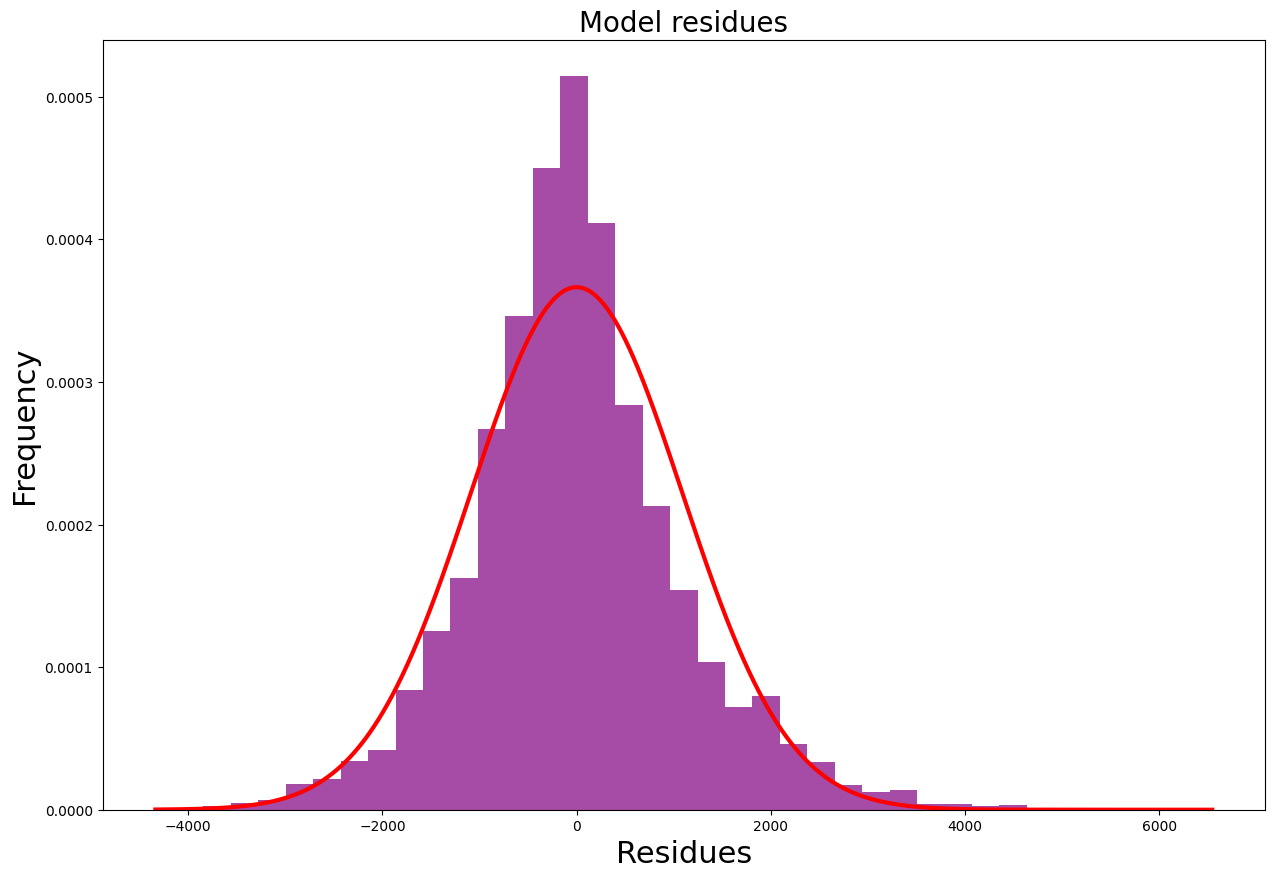

In [19]:
(mu, std) = norm.fit(stepwise_model.resid)

plt.figure(figsize=(15, 10))
plt.hist(reg.resid, bins=35, density=True, alpha=0.7, color='purple')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=3, color='red')
plt.title('Model residues', fontsize=20)
plt.xlabel('Residues', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.show()

In [20]:
# box-cox transformation for dependent variable
y_box, lmbda = boxcox(df_dummies['Item_Outlet_Sales'])
df_dummies['Item_Outlet_Sales_bc'] = y_box
df_dummies

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Fat_Content_low_fat,Item_Fat_Content_reg,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Supermarket_Type2,Item_Outlet_Sales_bc
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,...,0,0,0,1,1,0,0,0,0,40.251346
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,...,1,0,0,0,1,0,0,1,1,18.821258
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,...,0,0,0,1,1,0,0,0,0,32.942631
4,NCD19,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,...,0,0,0,0,0,0,0,1,0,25.289718
5,FDP36,10.395,0.000000,51.4008,2009,556.6088,0,1,0,0,...,1,0,0,0,1,0,0,1,1,20.475850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,0.083607,178.8318,1997,3608.6360,0,0,0,1,...,0,0,1,0,0,1,0,0,0,39.776160
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,...,0,0,0,0,0,0,0,1,0,36.335820
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,...,0,1,0,0,0,1,1,0,0,26.990973
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,...,1,0,0,0,1,0,0,1,1,31.498276


In [21]:
# defining formula
columns_list = list(df_dummies.drop(columns=['Item_Identifier',
                                             'Item_Outlet_Sales',
                                             'Item_Outlet_Sales_bc']).columns)
model_formula = ' + '.join(columns_list)
model_formula = 'Item_Outlet_Sales_bc ~ ' + model_formula

reg_bc = sm.OLS.from_formula(formula=model_formula, data=df_dummies).fit()

In [22]:
reg_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Item_Outlet_Sales_bc   R-squared:                       0.504
Model:                              OLS   Adj. R-squared:                  0.502
Method:                   Least Squares   F-statistic:                     180.9
Date:                  Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:19:16   Log-Likelihood:                -14641.
No. Observations:                  4650   AIC:                         2.934e+04
Df Residuals:                      4623   BIC:                         2.951e+04
Df Model:                            26                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0056      0.001      4.133      0.000       0.003       0.008
Item_Weight                        -0.0149      0.018     -0.831      0.406      -0.050       0.020
Item_Visibility                    -1.2397      1.870     -0.663      0.507      -4.906       2.427
Item_MRP                            0.0900      0.001     67.225      0.000       0.087       0.093
Outlet_Establishment_Year           0.0100      0.000     32.929      0.000       0.009       0.011
Item_Fat_Content_Low_Fat            0.0449      0.440      0.102      0.919      -0.817       0.907
Item_Fat_Content_Regular            0.1487      0.455      0.327      0.744      -0.743       1.040
Item_Fat_Content_low_fat            1.0592      0.889      1.192      0.233      -0.683       2.801
Item_Fat_Content_reg               -0.6837      0.799     -0.856      0.392      -2.250       0.883
Item_Type_Breads                    0.7323      0.579      1.266      0.206      -0.402       1.867
Item_Type_Breakfast                -0.6970      0.803     -0.868      0.385      -2.271       0.877
Item_Type_Canned                   -0.0152      0.425     -0.036      0.971      -0.847       0.817
Item_Type_Dairy                    -0.6451      0.421     -1.531      0.126      -1.471       0.181
Item_Type_Frozen_Foods             -0.3362      0.398     -0.844      0.399      -1.117       0.445
Item_Type_Fruits_and_Vegetables    -0.1502      0.374     -0.402      0.688      -0.883       0.583
Item_Type_Hard_Drinks              -0.0189      0.613     -0.031      0.975      -1.220       1.183
Item_Type_Health_and_Hygiene        0.1210      0.466      0.260      0.795      -0.792       1.034
Item_Type_Household                -0.1151      0.408     -0.282      0.778      -0.915       0.685
Item_Type_Meat                      0.0903      0.486      0.186      0.853      -0.863       1.044
Item_Type_Others                    0.1867      0.673      0.277      0.782      -1.134       1.507
Item_Type_Seafood                   1.5205      1.031      1.474      0.140      -0.501       3.542
Item_Type_Snack_Foods               0.2207      0.376      0.587      0.557      -0.516       0.958
Item_Type_Soft_Drinks              -0.3603      0.478     -0.753      0.451      -1.298       0.577
Item_Type_Starchy_Foods             0.0889      0.679      0.131      0.896      -1.243       1.421
Outlet_Identifier_OUT018           -0.7552      0.094     -8.041      0.000      -0.939      -0.571
Outlet_Identifier_OUT035            0.1808      0.086      2.091      0.037       0.011       0.350
Outlet_Identifier_OUT046           -0.2797      0.117     -2.399      0.016      -0.508      -0.051
Outlet_Identifier_OUT049            0.4289      0.091      4.

In [23]:
# stepwise procedure after box cox transformation
stepwise_model_bc = stepwise(reg_bc, pvalue_limit=0.05)
stepwise_model_bc

Regression type: OLS 

Estimating model...: 
 Item_Outlet_Sales_bc ~ Q('Item_Weight') + Q('Item_Visibility') + Q('Item_MRP') + Q('Outlet_Establishment_Year') + Q('Item_Fat_Content_Low_Fat') + Q('Item_Fat_Content_Regular') + Q('Item_Fat_Content_low_fat') + Q('Item_Fat_Content_reg') + Q('Item_Type_Breads') + Q('Item_Type_Breakfast') + Q('Item_Type_Canned') + Q('Item_Type_Dairy') + Q('Item_Type_Frozen_Foods') + Q('Item_Type_Fruits_and_Vegetables') + Q('Item_Type_Hard_Drinks') + Q('Item_Type_Health_and_Hygiene') + Q('Item_Type_Household') + Q('Item_Type_Meat') + Q('Item_Type_Others') + Q('Item_Type_Seafood') + Q('Item_Type_Snack_Foods') + Q('Item_Type_Soft_Drinks') + Q('Item_Type_Starchy_Foods') + Q('Outlet_Identifier_OUT018') + Q('Outlet_Identifier_OUT035') + Q('Outlet_Identifier_OUT046') + Q('Outlet_Identifier_OUT049') + Q('Outlet_Size_Medium') + Q('Outlet_Size_Small') + Q('Outlet_Location_Type_Tier_2') + Q('Outlet_Location_Type_Tier_3') + Q('Outlet_Type_Supermarket_Type2')

 Discarding 

In [24]:
sf_test = shapiro_francia(stepwise_model_bc.resid)
alpha = 0.05
print(round(sf_test['p-value'], 3), alpha)
if sf_test['p-value'] > alpha:
    print('Do not deny H0 - Distribution adherent to normality')
else:
    print('Deny H0 - Distribution not adherent to normality')

method  :  Shapiro-Francia normality test
statistics W  :  0.987258105172243
statistics z  :  8.951343248640724
p-value  :  1.7559126221594408e-19
0.0 0.05
Deny H0 - Distribution not adherent to normality


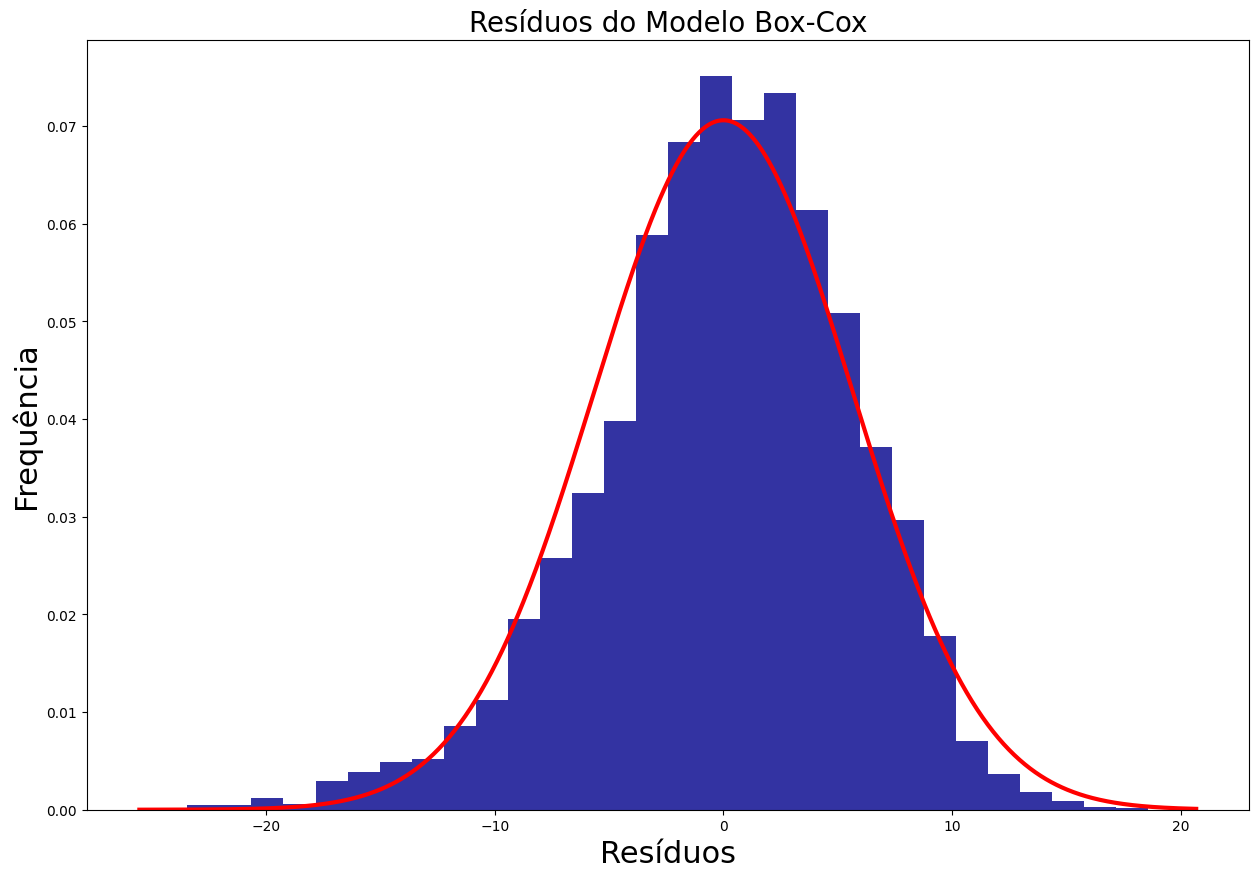

In [25]:
(mu_bc, std_bc) = norm.fit(stepwise_model_bc.resid)

# Criação do gráfico
plt.figure(figsize=(15,10))
plt.hist(stepwise_model_bc.resid, bins=30, density=True, alpha=0.8, color='darkblue')
xmin_bc, xmax_bc = plt.xlim()
x_bc = np.linspace(xmin_bc, xmax_bc, 1000)
p_bc = norm.pdf(x_bc, mu_bc, std_bc)
plt.plot(x_bc, p_bc, linewidth=3, color='red')
plt.title('Resídues of Box-Cox model', fontsize=20)
plt.xlabel('Residues', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.show()

# THERE IS NO MODEL